### Installation de bibliothéques:

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import nltk

In [110]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [112]:
import os
print(os.getcwd())  # Affiche le répertoire de travail actuel


C:\Users\Dell


 ## Téléchargement du Dataset

In [114]:
# Installer Kaggle (si nécessaire)
!pip install kaggle

# Charger un fichier Kaggle exporté (à placer dans le répertoire de travail)
import pandas as pd

# Remplacer 'data.csv' par le nom du fichier téléchargé
data = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding="latin-1")

# Aperçu des premières lignes
data.head()


,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


## Prétraitement des données

#### Nommer les colonnes

In [115]:
print(data.columns)


Index(['0', '1467810369', 'Mon Apr 06 22:19:45 PDT 2009', 'NO_QUERY',
       '_TheSpecialOne_',
       '@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D'],
      dtype='object')


In [186]:
import pandas as pd

# Définir les noms des colonnes
columns = ['id', 'timestamp', 'query', 'user', 'text']

# Charger le fichier CSV avec les noms de colonnes et spécifier l'encodage
data = pd.read_csv("training.1600000.processed.noemoticon.csv", names=columns, header=None, encoding='latin-1')

# Vérifiez les colonnes après chargement
print(data.columns)

data.head()


Index(['id', 'timestamp', 'query', 'user', 'text'], dtype='object')


,id,timestamp,query,user,text
0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [120]:
import nltk
nltk.download('punkt')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### Nettoyer les tweets en supprimant les hashtags, mentions, URLs, et autres caractères inutiles.
#### Convertir les textes en minuscules.

In [122]:

import re
from nltk.tokenize import word_tokenize
import nltk
# Télécharger les ressources nécessaires de NLTK
nltk.download('punkt')

# Fonction de nettoyage
def preprocess_tweet(tweet):
    # Supprimer les mentions, hashtags, URLs et caractères non alphabétiques
    tweet = re.sub(r"@\w+|#\w+|http\S+|[^a-zA-Z\s]", "", tweet)
    tweet = tweet.lower()  # Convertir en minuscules
    return tweet

# Appliquer le prétraitement sur les 5000 premiers tweets
data_subset = data.head(5000).copy()
data_subset['cleaned_text'] = data_subset['text'].apply(preprocess_tweet)

# Vérifier les résultats
print(data_subset[['text', 'cleaned_text']].head())




[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                                text  \
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...   
0  is upset that he can't update his Facebook by ...   
0  @Kenichan I dived many times for the ball. Man...   
0    my whole body feels itchy and like its on fire    
0  @nationwideclass no, it's not behaving at all....   

                                        cleaned_text  
0     awww thats a bummer  you shoulda got david ...  
0  is upset that he cant update his facebook by t...  
0   i dived many times for the ball managed to sa...  
0    my whole body feels itchy and like its on fire   
0   no its not behaving at all im mad why am i he...  


## Visualisation des différences entre les tweets avant et après nettoyage

#### Tableau comparatif

In [140]:
# Affichage du tableau comparatif
comparison_df = data_subset[['text', 'cleaned_text']]
print("Tableau comparatif des tweets avant et après nettoyage :")
display(comparison_df.head())  # Utilisation de display pour un rendu clair dans un notebook



Tableau comparatif des tweets avant et après nettoyage :


,text,cleaned_text
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww thats a bummer you shoulda got david ...
0,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...
0,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sa...
0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
0,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i he...


#### Histogramme des longueurs des tweets

Longueur des tweets originaux (min, max, moyenne) : 6 157 75.3038
Longueur des tweets nettoyés (min, max, moyenne) : 0 142 65.5712


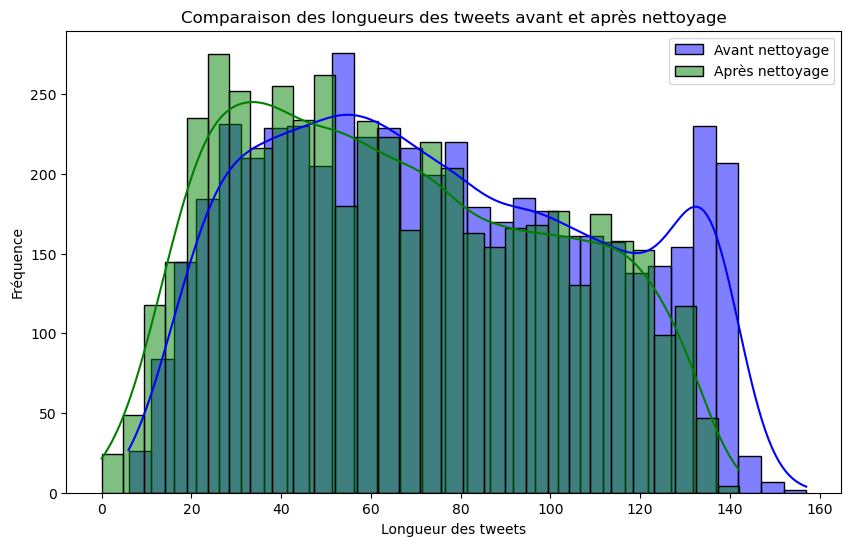

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcul des longueurs des tweets avant et après nettoyage
data_subset['original_length'] = data_subset['text'].apply(len)
data_subset['cleaned_length'] = data_subset['cleaned_text'].apply(lambda x: len(x.strip()))  # Suppression des espaces inutiles

# Afficher les valeurs minimales, maximales et moyennes pour vérifier les longueurs
print("Longueur des tweets originaux (min, max, moyenne) :", data_subset['original_length'].min(), data_subset['original_length'].max(), data_subset['original_length'].mean())
print("Longueur des tweets nettoyés (min, max, moyenne) :", data_subset['cleaned_length'].min(), data_subset['cleaned_length'].max(), data_subset['cleaned_length'].mean())

# Tracer les histogrammes
plt.figure(figsize=(10, 6))
sns.histplot(data_subset['original_length'], bins=30, kde=True, color='blue', label='Avant nettoyage')
sns.histplot(data_subset['cleaned_length'], bins=30, kde=True, color='green', label='Après nettoyage')
plt.title('Comparaison des longueurs des tweets avant et après nettoyage')
plt.xlabel('Longueur des tweets')
plt.ylabel('Fréquence')
plt.legend()
plt.show()


## Traitement des tweets avec NLTK

##### Transformer les tweets nettoyés en ensembles de mots (tokens).
##### Effectuer une analyse en respectant les étapes de base du NLP :
###### Tokenisation
###### Suppression des mots vides
###### Stemmatisation (réduction à la racine des mots)

In [26]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Télécharger les mots vides en anglais
nltk.download('stopwords')

# Charger la liste des mots vides
stop_words = set(stopwords.words("english"))

# Initialiser le stemmer
stemmer = PorterStemmer()

# Fonction pour appliquer le traitement NLP
def process_tweet(tweet):
    tokens = word_tokenize(tweet)  # Tokenisation
    tokens = [word for word in tokens if word not in stop_words]  # Supprimer les mots vides
    tokens = [stemmer.stem(word) for word in tokens]  # Stemmatisation
    return tokens

# Appliquer le traitement NLP
data_subset['processed_tokens'] = data_subset['cleaned_text'].apply(process_tweet)

# Vérifier les résultats
print(data_subset[['cleaned_text', 'processed_tokens']].head())



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                        cleaned_text  \
0     awww thats a bummer  you shoulda got david ...   
0  is upset that he cant update his facebook by t...   
0   i dived many times for the ball managed to sa...   
0    my whole body feels itchy and like its on fire    
0   no its not behaving at all im mad why am i he...   

                                    processed_tokens  
0  [awww, that, bummer, shoulda, got, david, carr...  
0  [upset, cant, updat, facebook, text, might, cr...  
0  [dive, mani, time, ball, manag, save, rest, go...  
0             [whole, bodi, feel, itchi, like, fire]  
0                        [behav, im, mad, cant, see]  


## Visualisation des différences entre les tweets prétraités et les tweets après nltk

#### Tableau comparatif

In [168]:

# Comparaison des tweets après traitement NLTK
nltk_comparison_df = data_subset[['cleaned_text', 'processed_tokens']]

# Affichage du tableau comparatif
print("Tableau comparatif : Tweets après prétraitement et après traitement NLTK")
print(nltk_comparison_df.head())

# Pour une meilleure visualisation dans Jupyter Notebook ou un environnement IPython
import IPython.display as display
display.display(nltk_comparison_df)  # Affiche un joli tableau dans Jupyter

Tableau comparatif : Tweets après prétraitement et après traitement NLTK
                                        cleaned_text  \
0     awww thats a bummer  you shoulda got david ...   
0  is upset that he cant update his facebook by t...   
0   i dived many times for the ball managed to sa...   
0    my whole body feels itchy and like its on fire    
0   no its not behaving at all im mad why am i he...   

                                    processed_tokens  
0  [awww, that, bummer, shoulda, got, david, carr...  
0  [upset, cant, updat, facebook, text, might, cr...  
0  [dive, mani, time, ball, manag, save, rest, go...  
0             [whole, bodi, feel, itchi, like, fire]  
0                        [behav, im, mad, cant, see]  


,cleaned_text,processed_tokens
0,awww thats a bummer you shoulda got david ...,"[awww, that, bummer, shoulda, got, david, carr..."
0,is upset that he cant update his facebook by t...,"[upset, cant, updat, facebook, text, might, cr..."
0,i dived many times for the ball managed to sa...,"[dive, mani, time, ball, manag, save, rest, go..."
0,my whole body feels itchy and like its on fire,"[whole, bodi, feel, itchi, like, fire]"
0,no its not behaving at all im mad why am i he...,"[behav, im, mad, cant, see]"
...,...,...
0,long day today,"[long, day, today]"
0,a friend broke his promises,"[friend, broke, promis]"
0,i am fine thanks tired,"[fine, thank, tire]"
0,trying to keep my eyes opendamn baking,"[tri, keep, eye, opendamn, bake]"


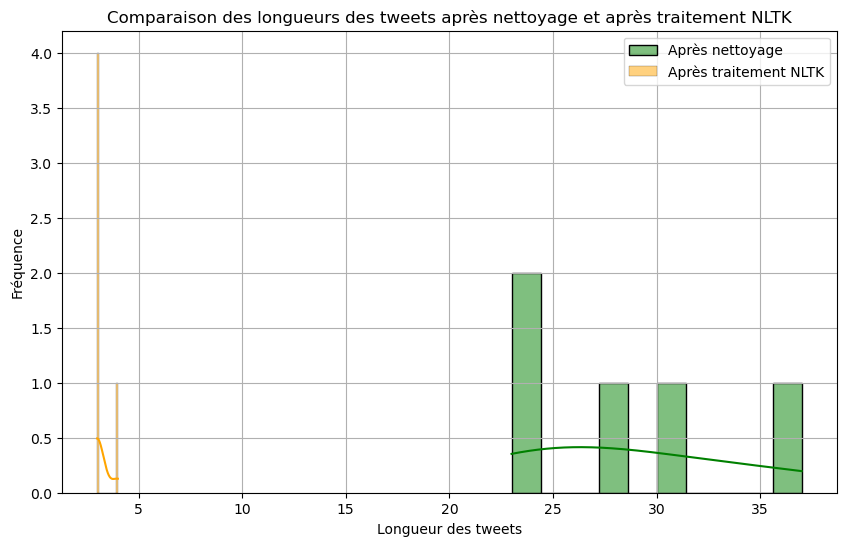

                            cleaned_text                   processed_tokens  \
0               This is an example tweet               [thi, exampl, tweet]   
1           Another tweet for processing            [anoth, tweet, process]   
2                Clean data for analysis             [clean, data, analysi]   
3        Removing stopwords and stemming            [remov, stopword, stem]   
4  Natural language processing in Python  [natur, languag, process, python]   

   clean_length  nltk_length  
0            24            3  
1            28            3  
2            23            3  
3            31            3  
4            37            4  


In [184]:


# Appliquer le traitement NLP sur les tweets nettoyés
tweets_df['processed_tokens'] = tweets_df['cleaned_text'].apply(process_tweet)

# Calcul des longueurs des tweets après traitement NLTK
tweets_df['nltk_length'] = tweets_df['processed_tokens'].apply(lambda x: len(x))

# Calcul de la longueur des tweets après nettoyage
tweets_df['clean_length'] = tweets_df['cleaned_text'].apply(len)

# Tracer les histogrammes
plt.figure(figsize=(10, 6))

# Histogramme de la longueur des tweets après nettoyage
sns.histplot(tweets_df['clean_length'], bins=10, kde=True, color='green', label='Après nettoyage')

# Histogramme de la longueur des tweets après traitement NLTK
sns.histplot(tweets_df['nltk_length'], bins=10, kde=True, color='orange', label='Après traitement NLTK')

# Personnalisation du graphique
plt.title("Comparaison des longueurs des tweets après nettoyage et après traitement NLTK")
plt.xlabel("Longueur des tweets")
plt.ylabel("Fréquence")
plt.legend()
plt.grid(True)
plt.show()

# Affichage des résultats de la comparaison
print(tweets_df[['cleaned_text', 'processed_tokens', 'clean_length', 'nltk_length']].head())



## Classification des tweets avec K-Means

##### Utiliser les tokens pour regrouper les tweets similaires en clusters.
##### Calculer la distance de Jaccard pour mesurer la similarité entre deux ensembles de mots.

### Pour K=5

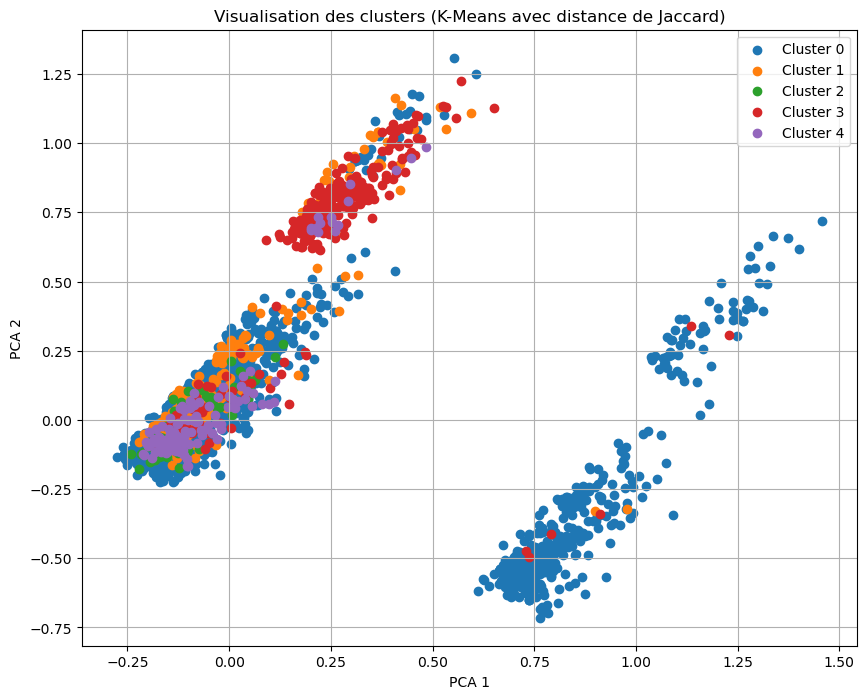

In [30]:
import numpy as np
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Fonction pour convertir les tokens en vecteurs binaires
def tokens_to_vector(tokens, vocabulary):
    return [1 if word in tokens else 0 for word in vocabulary]

# Construire le vocabulaire unique
vocabulary = set(word for tokens in data_subset['processed_tokens'] for word in tokens)

# Convertir les tweets en vecteurs binaires (avec conversion explicite en booléen)
vectors = np.array([tokens_to_vector(tokens, vocabulary) for tokens in data_subset['processed_tokens']], dtype=bool)

# Fonction pour calculer la distance de Jaccard
def jaccard_distance_matrix(vectors):
    return pairwise_distances(vectors, metric='jaccard')

# Implémentation personnalisée de K-Means avec distance de Jaccard
def kmeans_jaccard(vectors, n_clusters, max_iter=100, random_state=42):
    np.random.seed(random_state)
    n_samples = vectors.shape[0]
    
    # Initialisation aléatoire des centroïdes
    initial_centroids_idx = np.random.choice(n_samples, n_clusters, replace=False)
    centroids = vectors[initial_centroids_idx]
    
    for iteration in range(max_iter):
        # Calcul des distances Jaccard
        distances = pairwise_distances(vectors, centroids, metric='jaccard')
        
        # Attribution des clusters
        labels = np.argmin(distances, axis=1)
        
        # Mise à jour des centroïdes
        new_centroids = []
        for cluster in range(n_clusters):
            cluster_points = vectors[labels == cluster]
            if len(cluster_points) > 0:
                medoid_idx = np.argmin(np.sum(pairwise_distances(cluster_points, cluster_points, metric='jaccard'), axis=1))
                new_centroids.append(cluster_points[medoid_idx])
            else:
                # Réinitialisation du centroïde si cluster vide
                new_centroids.append(vectors[np.random.choice(n_samples)])
        
        new_centroids = np.array(new_centroids)
        
        # Vérifier la convergence
        if np.array_equal(centroids, new_centroids):
            break
        centroids = new_centroids

    return labels, centroids

# Appliquer K-Means avec distance de Jaccard
n_clusters = 5
labels, centroids = kmeans_jaccard(vectors, n_clusters)

# Ajouter les labels aux données
data_subset['cluster'] = labels

# Réduction de dimension pour visualisation
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors)

# Visualisation des clusters
plt.figure(figsize=(10, 8))
for cluster in range(n_clusters):
    cluster_points = reduced_vectors[data_subset['cluster'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster}")
plt.title("Visualisation des clusters (K-Means avec distance de Jaccard)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.grid()
plt.show()


### Pour K=3

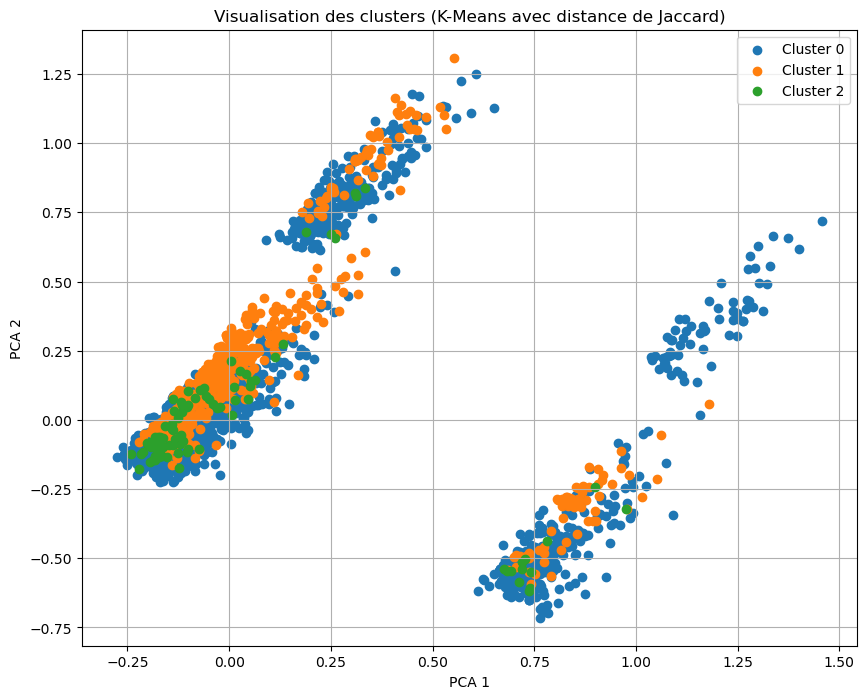

In [33]:
import numpy as np
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Fonction pour convertir les tokens en vecteurs binaires
def tokens_to_vector(tokens, vocabulary):
    return [1 if word in tokens else 0 for word in vocabulary]

# Construire le vocabulaire unique
vocabulary = set(word for tokens in data_subset['processed_tokens'] for word in tokens)

# Convertir les tweets en vecteurs binaires (avec conversion explicite en booléen)
vectors = np.array([tokens_to_vector(tokens, vocabulary) for tokens in data_subset['processed_tokens']], dtype=bool)

# Fonction pour calculer la distance de Jaccard
def jaccard_distance_matrix(vectors):
    return pairwise_distances(vectors, metric='jaccard')

# Implémentation personnalisée de K-Means avec distance de Jaccard
def kmeans_jaccard(vectors, n_clusters, max_iter=100, random_state=42):
    np.random.seed(random_state)
    n_samples = vectors.shape[0]
    
    # Initialisation aléatoire des centroïdes
    initial_centroids_idx = np.random.choice(n_samples, n_clusters, replace=False)
    centroids = vectors[initial_centroids_idx]
    
    for iteration in range(max_iter):
        # Calcul des distances Jaccard
        distances = pairwise_distances(vectors, centroids, metric='jaccard')
        
        # Attribution des clusters
        labels = np.argmin(distances, axis=1)
        
        # Mise à jour des centroïdes
        new_centroids = []
        for cluster in range(n_clusters):
            cluster_points = vectors[labels == cluster]
            if len(cluster_points) > 0:
                medoid_idx = np.argmin(np.sum(pairwise_distances(cluster_points, cluster_points, metric='jaccard'), axis=1))
                new_centroids.append(cluster_points[medoid_idx])
            else:
                # Réinitialisation du centroïde si cluster vide
                new_centroids.append(vectors[np.random.choice(n_samples)])
        
        new_centroids = np.array(new_centroids)
        
        # Vérifier la convergence
        if np.array_equal(centroids, new_centroids):
            break
        centroids = new_centroids

    return labels, centroids

# Appliquer K-Means avec distance de Jaccard
n_clusters = 3
labels, centroids = kmeans_jaccard(vectors, n_clusters)

# Ajouter les labels aux données
data_subset['cluster'] = labels

# Réduction de dimension pour visualisation
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors)

# Visualisation des clusters
plt.figure(figsize=(10, 8))
for cluster in range(n_clusters):
    cluster_points = reduced_vectors[data_subset['cluster'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster}")
plt.title("Visualisation des clusters (K-Means avec distance de Jaccard)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.grid()
plt.show()



### Pour k=10

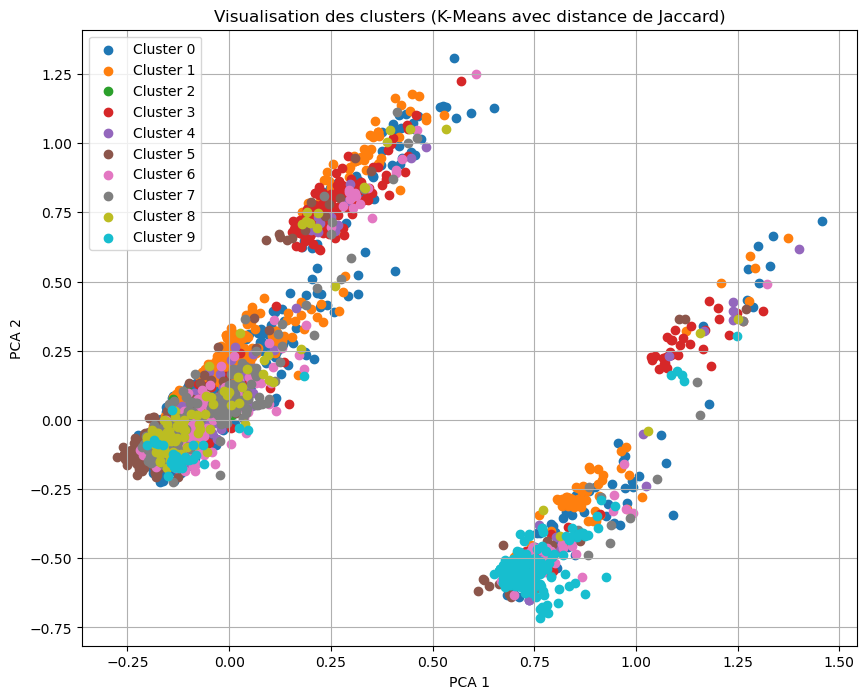

In [35]:
import numpy as np
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Fonction pour convertir les tokens en vecteurs binaires
def tokens_to_vector(tokens, vocabulary):
    return [1 if word in tokens else 0 for word in vocabulary]

# Construire le vocabulaire unique
vocabulary = set(word for tokens in data_subset['processed_tokens'] for word in tokens)

# Convertir les tweets en vecteurs binaires (avec conversion explicite en booléen)
vectors = np.array([tokens_to_vector(tokens, vocabulary) for tokens in data_subset['processed_tokens']], dtype=bool)

# Fonction pour calculer la distance de Jaccard
def jaccard_distance_matrix(vectors):
    return pairwise_distances(vectors, metric='jaccard')

# Implémentation personnalisée de K-Means avec distance de Jaccard
def kmeans_jaccard(vectors, n_clusters, max_iter=100, random_state=42):
    np.random.seed(random_state)
    n_samples = vectors.shape[0]
    
    # Initialisation aléatoire des centroïdes
    initial_centroids_idx = np.random.choice(n_samples, n_clusters, replace=False)
    centroids = vectors[initial_centroids_idx]
    
    for iteration in range(max_iter):
        # Calcul des distances Jaccard
        distances = pairwise_distances(vectors, centroids, metric='jaccard')
        
        # Attribution des clusters
        labels = np.argmin(distances, axis=1)
        
        # Mise à jour des centroïdes
        new_centroids = []
        for cluster in range(n_clusters):
            cluster_points = vectors[labels == cluster]
            if len(cluster_points) > 0:
                medoid_idx = np.argmin(np.sum(pairwise_distances(cluster_points, cluster_points, metric='jaccard'), axis=1))
                new_centroids.append(cluster_points[medoid_idx])
            else:
                # Réinitialisation du centroïde si cluster vide
                new_centroids.append(vectors[np.random.choice(n_samples)])
        
        new_centroids = np.array(new_centroids)
        
        # Vérifier la convergence
        if np.array_equal(centroids, new_centroids):
            break
        centroids = new_centroids

    return labels, centroids

# Appliquer K-Means avec distance de Jaccard
n_clusters = 10
labels, centroids = kmeans_jaccard(vectors, n_clusters)

# Ajouter les labels aux données
data_subset['cluster'] = labels

# Réduction de dimension pour visualisation
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors)

# Visualisation des clusters
plt.figure(figsize=(10, 8))
for cluster in range(n_clusters):
    cluster_points = reduced_vectors[data_subset['cluster'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster}")
plt.title("Visualisation des clusters (K-Means avec distance de Jaccard)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.grid()
plt.show()


## Classification avec Fuzzy C-Means

In [ ]:
!pip install scikit-fuzzy


In [ ]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='sklearn')


### Pour num_clusters=5

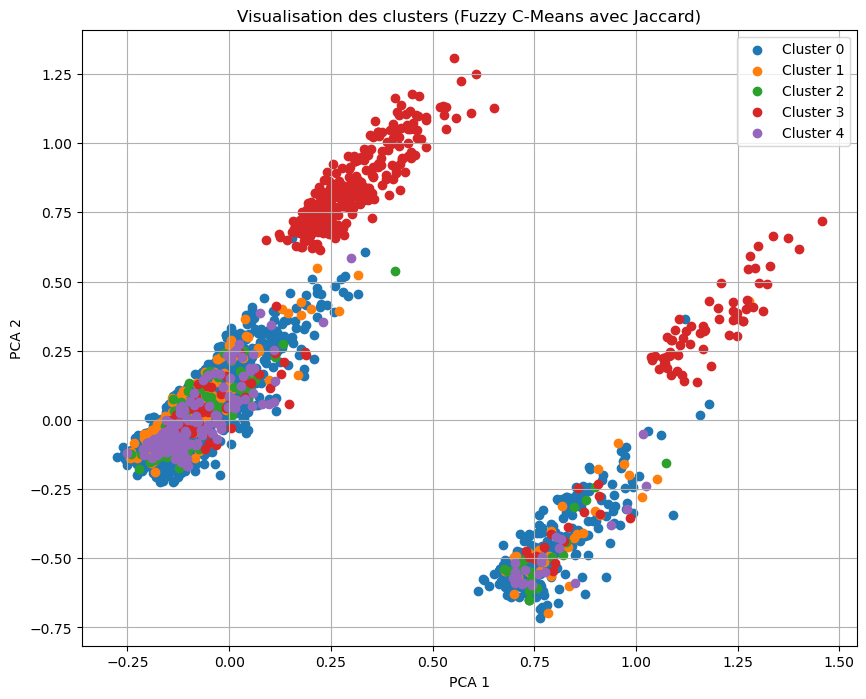

In [52]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Convertir les données en binaire
binary_vectors = (vectors > 0).astype(int)  # Convertir en binaire

# Calculer la matrice de distances de Jaccard
jaccard_distances = squareform(pdist(binary_vectors, metric="jaccard"))

# Initialisation des centroïdes
num_clusters = 5
np.random.seed(42)
initial_indices = np.random.choice(binary_vectors.shape[0], size=num_clusters, replace=False)
centroids = binary_vectors[initial_indices]

# Fonction pour calculer les adhésions
def compute_memberships(data, centroids, m=2):
    num_data = data.shape[0]
    num_clusters = centroids.shape[0]
    memberships = np.zeros((num_clusters, num_data))

    for i, centroid in enumerate(centroids):
        distances = [1 - np.sum(np.minimum(data[j], centroid)) / np.sum(np.maximum(data[j], centroid)) 
                     if np.sum(np.maximum(data[j], centroid)) > 0 else 1
                     for j in range(num_data)]
        distances = np.array(distances)
        
        for j in range(num_data):
            if distances[j] == 0:
                memberships[i, j] = 1.0
            else:
                memberships[i, j] = 1.0 / np.sum((distances[j] / (distances + 1e-10)) ** (2 / (m - 1)))

    return memberships

# Appliquer l'algorithme Fuzzy C-Means
max_iterations = 100
tolerance = 1e-5
m = 2

for iteration in range(max_iterations):
    memberships = compute_memberships(binary_vectors, centroids, m)
    new_centroids = np.dot(memberships, binary_vectors) / np.sum(memberships, axis=1, keepdims=True)

    if np.linalg.norm(new_centroids - centroids) < tolerance:
        break
    centroids = new_centroids

# Affectation finale des clusters
final_clusters = np.argmax(memberships, axis=0)

# Visualisation des clusters
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(binary_vectors)

plt.figure(figsize=(10, 8))
for cluster in range(num_clusters):
    cluster_points = reduced_vectors[final_clusters == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster}")

plt.title("Visualisation des clusters (Fuzzy C-Means avec Jaccard)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.grid()
plt.show()



### Pour num_clusters=12

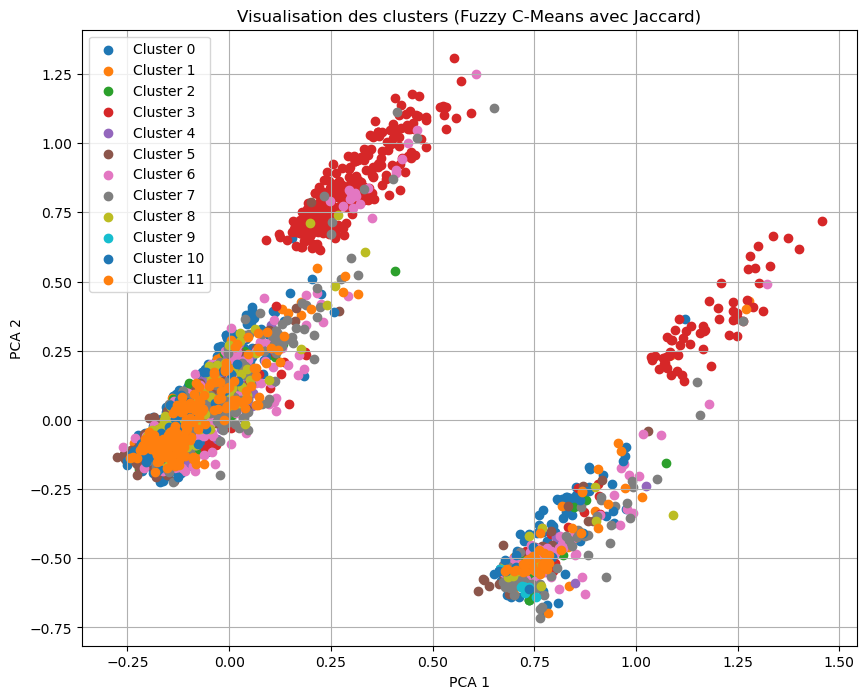

In [54]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Convertir les données en binaire
binary_vectors = (vectors > 0).astype(int)  # Convertir en binaire

# Calculer la matrice de distances de Jaccard
jaccard_distances = squareform(pdist(binary_vectors, metric="jaccard"))

# Initialisation des centroïdes
num_clusters = 12
np.random.seed(42)
initial_indices = np.random.choice(binary_vectors.shape[0], size=num_clusters, replace=False)
centroids = binary_vectors[initial_indices]

# Fonction pour calculer les adhésions
def compute_memberships(data, centroids, m=2):
    num_data = data.shape[0]
    num_clusters = centroids.shape[0]
    memberships = np.zeros((num_clusters, num_data))

    for i, centroid in enumerate(centroids):
        distances = [1 - np.sum(np.minimum(data[j], centroid)) / np.sum(np.maximum(data[j], centroid)) 
                     if np.sum(np.maximum(data[j], centroid)) > 0 else 1
                     for j in range(num_data)]
        distances = np.array(distances)
        
        for j in range(num_data):
            if distances[j] == 0:
                memberships[i, j] = 1.0
            else:
                memberships[i, j] = 1.0 / np.sum((distances[j] / (distances + 1e-10)) ** (2 / (m - 1)))

    return memberships

# Appliquer l'algorithme Fuzzy C-Means
max_iterations = 100
tolerance = 1e-5
m = 2

for iteration in range(max_iterations):
    memberships = compute_memberships(binary_vectors, centroids, m)
    new_centroids = np.dot(memberships, binary_vectors) / np.sum(memberships, axis=1, keepdims=True)

    if np.linalg.norm(new_centroids - centroids) < tolerance:
        break
    centroids = new_centroids

# Affectation finale des clusters
final_clusters = np.argmax(memberships, axis=0)

# Visualisation des clusters
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(binary_vectors)

plt.figure(figsize=(10, 8))
for cluster in range(num_clusters):
    cluster_points = reduced_vectors[final_clusters == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster}")

plt.title("Visualisation des clusters (Fuzzy C-Means avec Jaccard)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.grid()
plt.show()


### Pour num_clusters=25

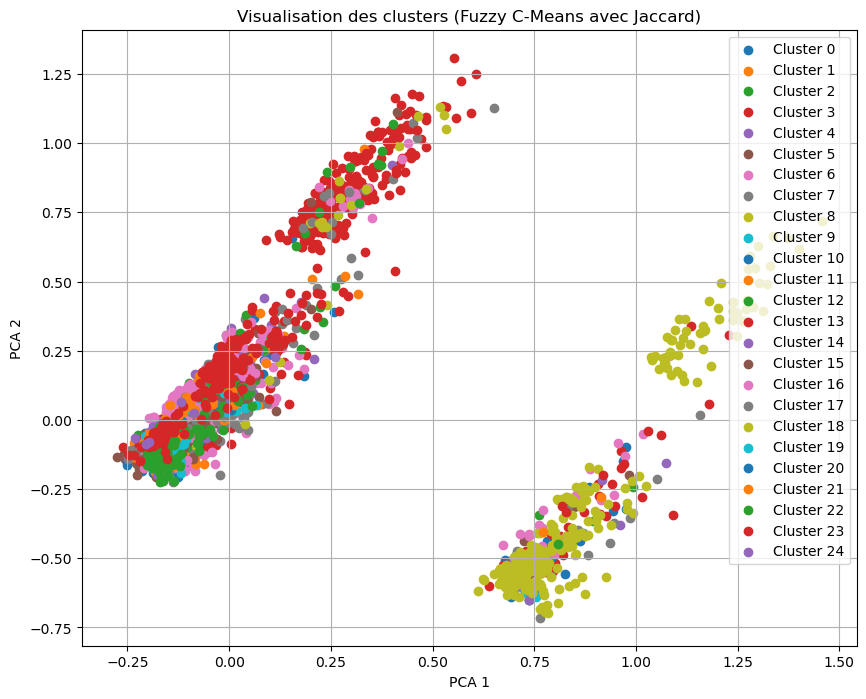

In [59]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Convertir les données en binaire
binary_vectors = (vectors > 0).astype(int)  # Convertir en binaire

# Calculer la matrice de distances de Jaccard
jaccard_distances = squareform(pdist(binary_vectors, metric="jaccard"))

# Initialisation des centroïdes
num_clusters = 25
np.random.seed(42)
initial_indices = np.random.choice(binary_vectors.shape[0], size=num_clusters, replace=False)
centroids = binary_vectors[initial_indices]

# Fonction pour calculer les adhésions
def compute_memberships(data, centroids, m=2):
    num_data = data.shape[0]
    num_clusters = centroids.shape[0]
    memberships = np.zeros((num_clusters, num_data))

    for i, centroid in enumerate(centroids):
        distances = [1 - np.sum(np.minimum(data[j], centroid)) / np.sum(np.maximum(data[j], centroid)) 
                     if np.sum(np.maximum(data[j], centroid)) > 0 else 1
                     for j in range(num_data)]
        distances = np.array(distances)
        
        for j in range(num_data):
            if distances[j] == 0:
                memberships[i, j] = 1.0
            else:
                memberships[i, j] = 1.0 / np.sum((distances[j] / (distances + 1e-10)) ** (2 / (m - 1)))

    return memberships

# Appliquer l'algorithme Fuzzy C-Means
max_iterations = 100
tolerance = 1e-5
m = 2

for iteration in range(max_iterations):
    memberships = compute_memberships(binary_vectors, centroids, m)
    new_centroids = np.dot(memberships, binary_vectors) / np.sum(memberships, axis=1, keepdims=True)

    if np.linalg.norm(new_centroids - centroids) < tolerance:
        break
    centroids = new_centroids

# Affectation finale des clusters
final_clusters = np.argmax(memberships, axis=0)

# Visualisation des clusters
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(binary_vectors)

plt.figure(figsize=(10, 8))
for cluster in range(num_clusters):
    cluster_points = reduced_vectors[final_clusters == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster}")

plt.title("Visualisation des clusters (Fuzzy C-Means avec Jaccard)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.grid()
plt.show()


### Choisir un tweet par cluster pour K-Means

In [69]:
import numpy as np
from sklearn.cluster import KMeans

# Appliquer K-Means sur les vecteurs de tweets (assurez-vous que 'vectors' est défini)
n_clusters = 5  # Choisissez le nombre de clusters souhaité
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Ajuster K-Means sur les vecteurs de données (par exemple, `vectors`)
kmeans.fit(vectors)

# Fonction pour trouver l'index du tweet le plus proche du centroïde
def get_representative_tweets(vectors, labels, centroids):
    representative_tweets = {}
    for cluster in range(len(centroids)):
        # Trouver les indices des tweets appartenant à ce cluster
        cluster_indices = np.where(labels == cluster)[0]
        # Calculer les distances des tweets au centroïde du cluster
        distances = np.linalg.norm(vectors[cluster_indices] - centroids[cluster], axis=1)
        # Trouver l'index du tweet le plus proche
        closest_index = cluster_indices[np.argmin(distances)]
        representative_tweets[cluster] = closest_index
    return representative_tweets

# Trouver les centroïdes et les labels des tweets
labels_kmeans = kmeans.labels_  # Récupérer les labels de cluster de K-Means
centroids_kmeans = kmeans.cluster_centers_  # Récupérer les centroïdes de K-Means

# Obtenir les indices des tweets représentatifs
representative_tweets_kmeans = get_representative_tweets(vectors, labels_kmeans, centroids_kmeans)

# Afficher les tweets représentatifs
print("Tweets représentatifs pour K-Means :")
for cluster, index in representative_tweets_kmeans.items():
    print(f"Cluster {cluster}: {data_subset.iloc[index]['cleaned_text']}")



Tweets représentatifs pour K-Means :
Cluster 0:  so sad 
Cluster 1: is tired 
Cluster 2:  me too  
Cluster 3: try to use skimmer by fallon for the first time like the overwiev and style would be cool ig you could browse the photos 
Cluster 4: feeling down 


### Choisir un tweet par cluster pour Fuzzy C-Means

In [63]:
# Trouver le tweet avec la probabilité la plus élevée pour chaque cluster
def get_representative_tweets_fuzzy(u, data_subset):
    representative_tweets = {}
    for cluster in range(u.shape[0]):
        # Trouver l'index du tweet avec la probabilité maximale pour ce cluster
        closest_index = np.argmax(u[cluster])
        representative_tweets[cluster] = closest_index
    return representative_tweets

# Obtenir les indices des tweets représentatifs pour Fuzzy C-Means
representative_tweets_fuzzy = get_representative_tweets_fuzzy(u, data_subset)

# Afficher les tweets représentatifs
print("\nTweets représentatifs pour Fuzzy C-Means :")
for cluster, index in representative_tweets_fuzzy.items():
    print(f"Cluster {cluster}: {data_subset.iloc[index]['cleaned_text']}")



Tweets représentatifs pour Fuzzy C-Means :
Cluster 0:  im off now 
Cluster 1: im working 
Cluster 2: im working 
Cluster 3:  and snow to go with it 
Cluster 4:  me too  


### Comparaison entre K Means et Fuzzy C Means

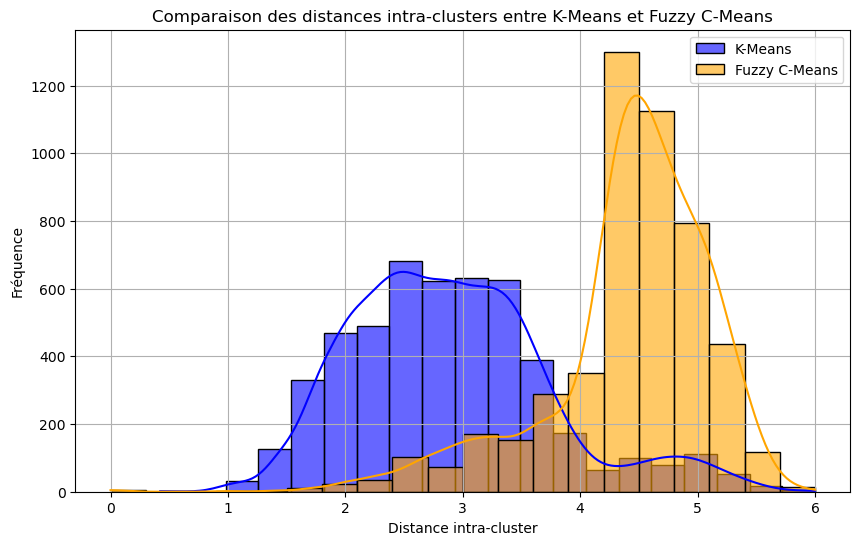

In [193]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from sklearn.decomposition import PCA
import seaborn as sns



# Maintenant, nous pouvons calculer les distances intra-clusters pour FCM
def intra_cluster_distance_fcm(vectors, labels, centroids, memberships):
    distances = []
    for cluster in range(num_clusters):
        cluster_points = vectors[labels == cluster]
        centroid = centroids[cluster]
        for point in cluster_points:
            # Calcul de la distance pondérée
            dist = np.sum(memberships[cluster] * np.linalg.norm(point - centroid))
            distances.append(dist)
    return distances

# Calcul des distances intra-clusters pour FCM
fcm_distances = intra_cluster_distance_fcm(binary_vectors, final_clusters, centroids, memberships)

# Tracer l'histogramme comparatif
plt.figure(figsize=(10, 6))

# Histogramme des distances intra-clusters pour K-Means
sns.histplot(kmeans_distances, bins=20, kde=True, color='blue', label='K-Means', alpha=0.6)

# Histogramme des distances intra-clusters pour FCM
sns.histplot(fcm_distances, bins=20, kde=True, color='orange', label='Fuzzy C-Means', alpha=0.6)

# Personnalisation du graphique
plt.title("Comparaison des distances intra-clusters entre K-Means et Fuzzy C-Means")
plt.xlabel("Distance intra-cluster")
plt.ylabel("Fréquence")
plt.legend()
plt.grid(True)
plt.show()
